In [1]:
import spacy
import nltk
import benepar
import zpar
from nltk import Tree
from nltk.draw.util import CanvasFrame
from nltk.draw import TreeWidget
from IPython.display import display
from benepar.spacy_plugin import BeneparComponent


/Users/jblackmore/Applications/anaconda/envs/compsem/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/jblackmore/Applications/anaconda/envs/compsem/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/jblackmore/Applications/anaconda/envs/compsem/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int1

In [2]:
ZPAR_MODEL_PATH = "/Users/jblackmore/Research/henry/models/zpar/english"

In [3]:
benepar.download('benepar_en')

[nltk_data] Downloading package benepar_en to
[nltk_data]     /Users/jblackmore/nltk_data...
[nltk_data]   Package benepar_en is already up-to-date!


True

In [4]:
nlp = spacy.load('en_core_web_lg')

In [5]:
nlp.add_pipe(BeneparComponent('benepar_en'))

In [6]:
Z = zpar.ZPar(ZPAR_MODEL_PATH)
z_parser = Z.get_parser()
#z_depparser = Z.get_depparser()

In [7]:
test_cases = {}
test_cases['hard_cardinality'] = "Six rolls of paper towels are enclosed in a plastic package with the brand name on it."
test_cases['soft_cardinality'] = "No more than two cheetahs are present."
test_cases['existential'] = "There are at most 3 water buffalos in the image pair."
test_cases['universal'] = "In one image there is a line of fence posts with one large darkly colored bird on top of each post."
test_cases['coordination'] = "Each image contains only one wolf, and all images include snowy backdrops."
test_cases['coreference'] = "there are four or more animals very close to each other on the grass in the image to the left."
test_cases['spatial_relations'] = "A stylus is near a laptop in one of the images."
test_cases['comparative'] = "There are more birds in the image on the right than in the image on the left."
test_cases['cc_attachment'] = "The left image shows a cream-layered dessert in a footed clear glass which includes sliced peanut butter cups and brownie chunks."
test_cases['pp_attachment'] = "At least one panda is sitting near a fallen branch on the ground."
test_cases['sbar_attachment'] = "Balloons float in a blue sky with dappled clouds on strings that angle rightward, in the right image."


First let's check out spaCy/BeNePar:

In [8]:
doc = nlp(test_cases['existential'])

In [9]:
sent = list(doc.sents)[0]

In [10]:
sent._.parse_string

'(S (NP (EX There)) (VP (VBP are) (NP (QP (IN at) (JJS most) (CD 3)) (NN water) (NNS buffalos)) (PP (IN in) (NP (DT the) (NN image) (NN pair)))) (. .))'

Now ZPar. 

In [11]:
z_parser.parse_sentence(test_cases['existential'])

'(S (NP (EX There)) (VP (VBP are) (PP (IN at) (NP (JJS most) (CD 3) (NN water) (NNS buffalos))) (PP (IN in) (NP (DT the) (NN image) (NN pair)))) (. .))'

In [12]:
z_parser.parse_sentence(sent.text)

'(S (NP (EX There)) (VP (VBP are) (PP (IN at) (NP (JJS most) (CD 3) (NN water) (NNS buffalos))) (PP (IN in) (NP (DT the) (NN image) (NN pair)))) (. .))'

In [13]:
sent._.parse_string

'(S (NP (EX There)) (VP (VBP are) (NP (QP (IN at) (JJS most) (CD 3)) (NN water) (NNS buffalos)) (PP (IN in) (NP (DT the) (NN image) (NN pair)))) (. .))'

hard_cardinality

Six rolls of paper towels are enclosed in a plastic package with the brand name on it.

SpaCy:


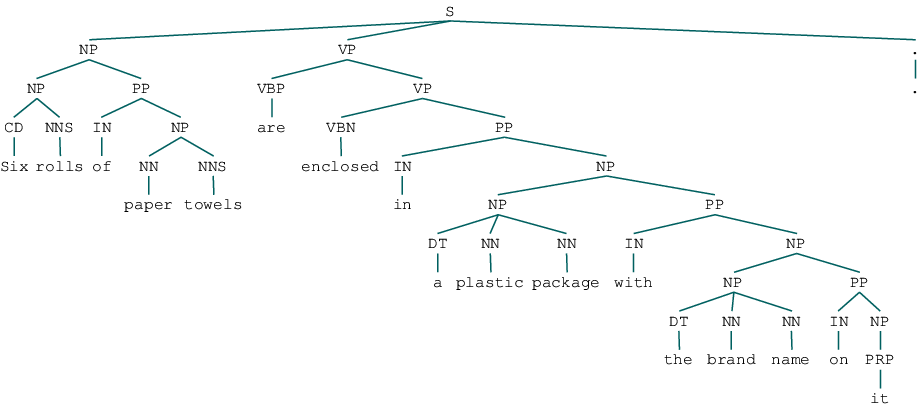

ZPar:


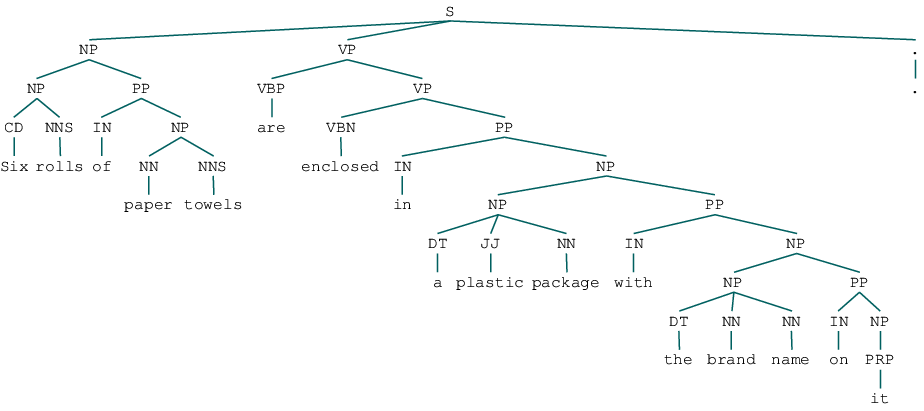

soft_cardinality

No more than two cheetahs are present.

SpaCy:


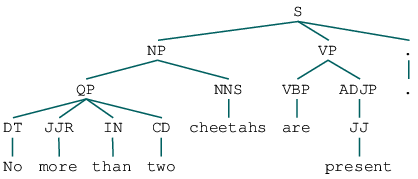

ZPar:


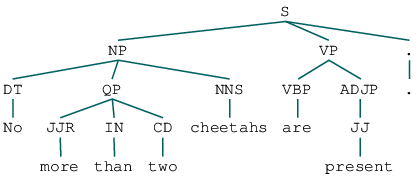

existential

There are at most 3 water buffalos in the image pair.

SpaCy:


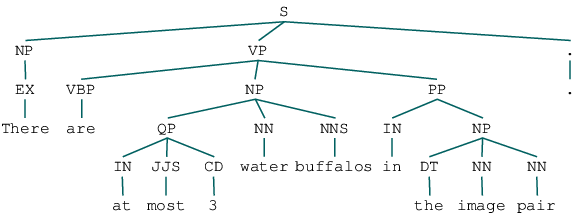

ZPar:


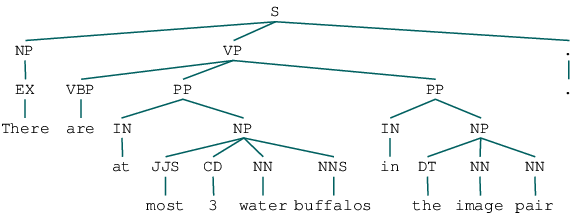

universal

In one image there is a line of fence posts with one large darkly colored bird on top of each post.

SpaCy:


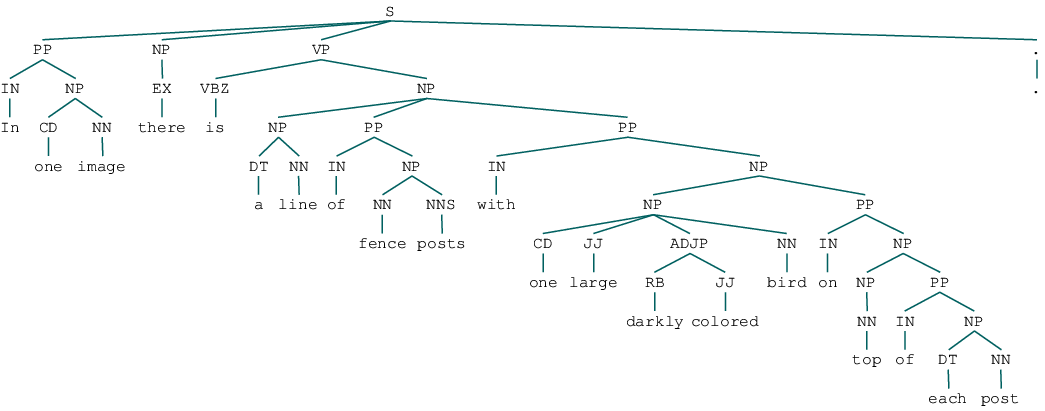

ZPar:


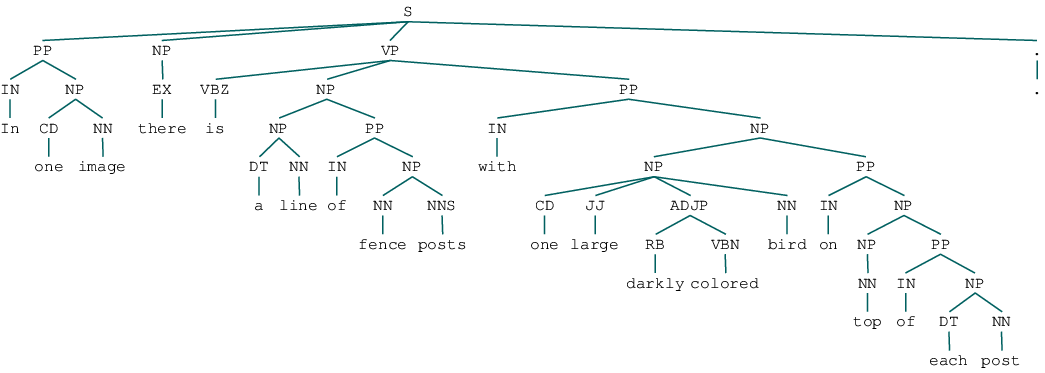

coordination

Each image contains only one wolf, and all images include snowy backdrops.

SpaCy:


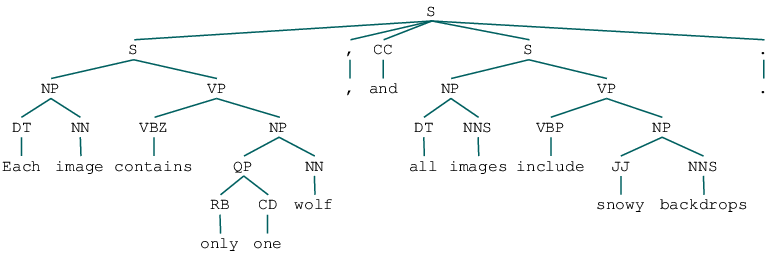

ZPar:


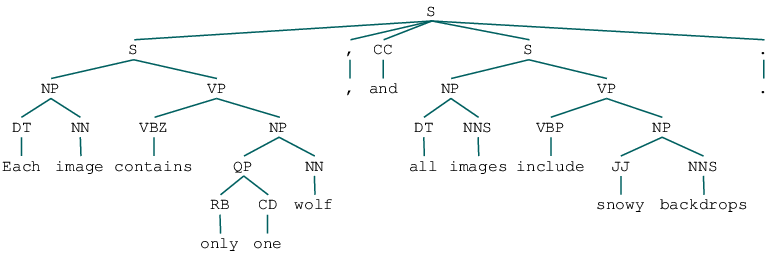

coreference

there are four or more animals very close to each other on the grass in the image to the left.

SpaCy:


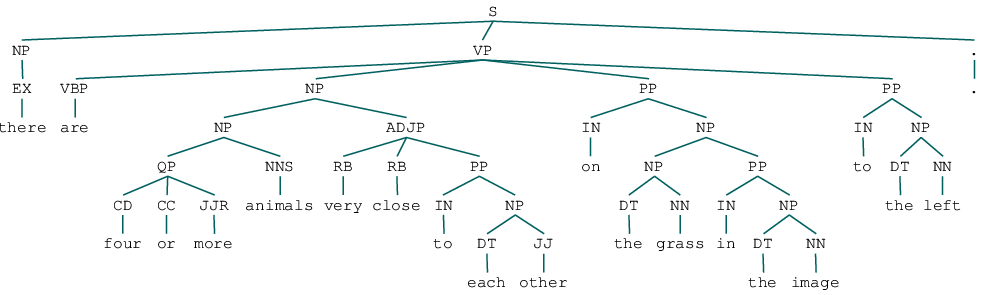

ZPar:


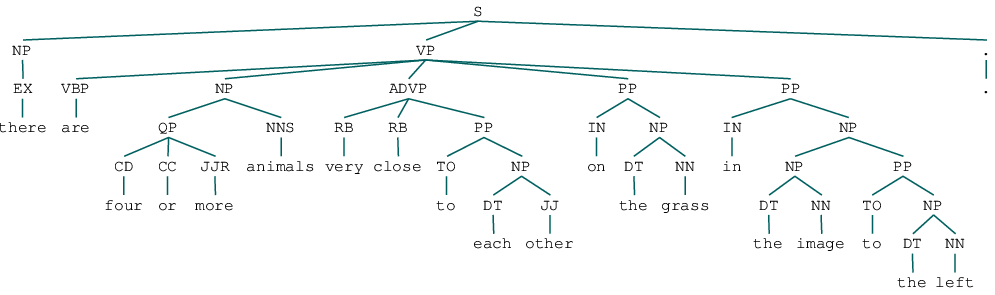

spatial_relations

A stylus is near a laptop in one of the images.

SpaCy:


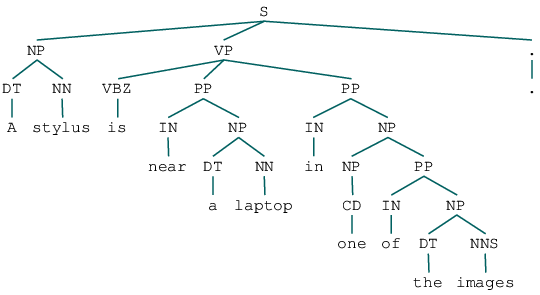

ZPar:


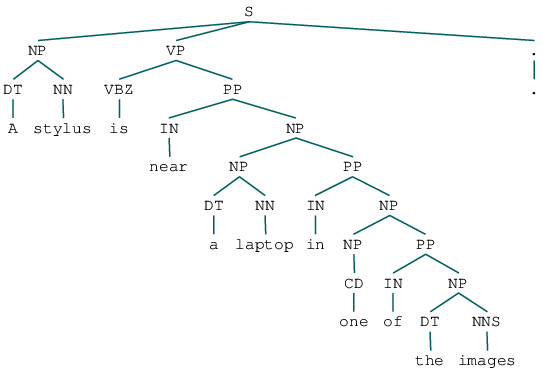

comparative

There are more birds in the image on the right than in the image on the left.

SpaCy:


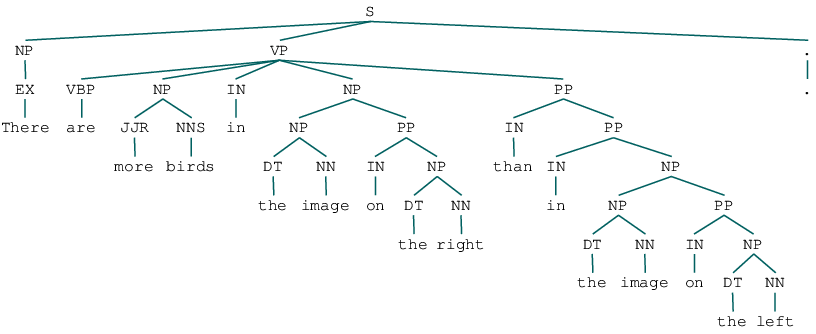

ZPar:


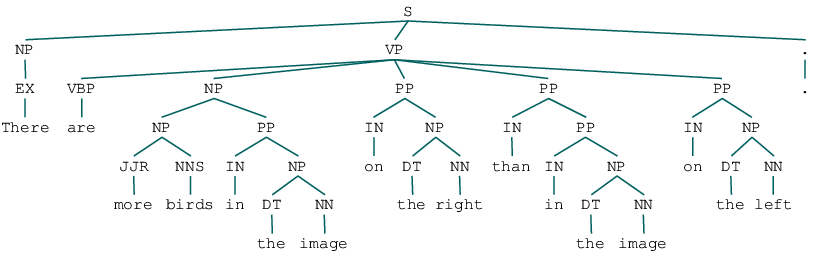

cc_attachment

The left image shows a cream-layered dessert in a footed clear glass which includes sliced peanut butter cups and brownie chunks.

SpaCy:


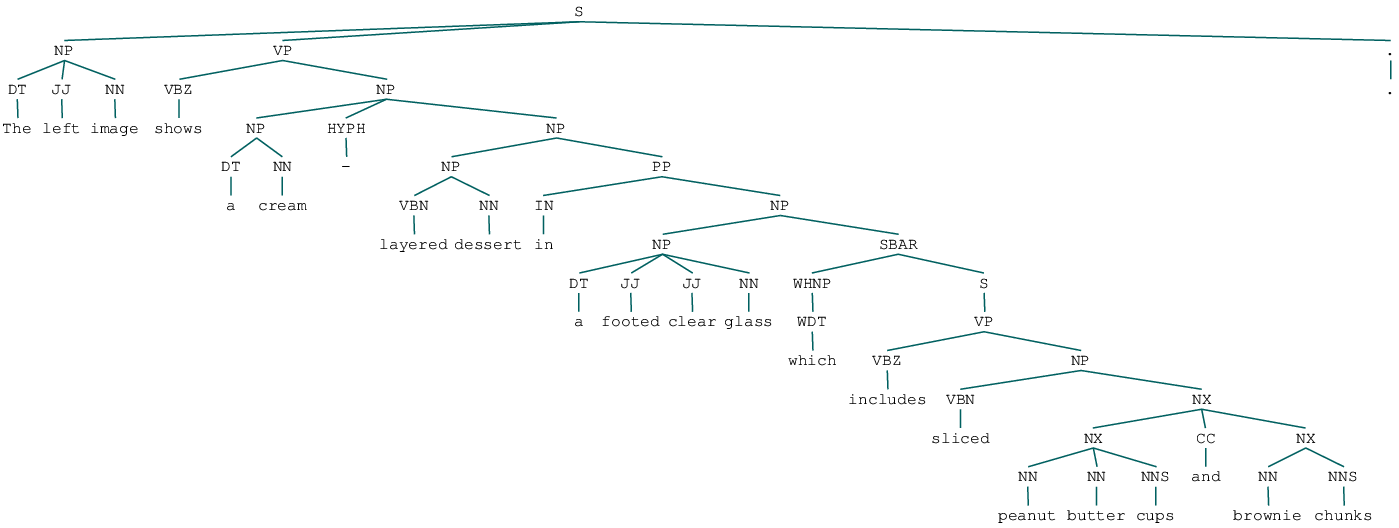

ZPar:


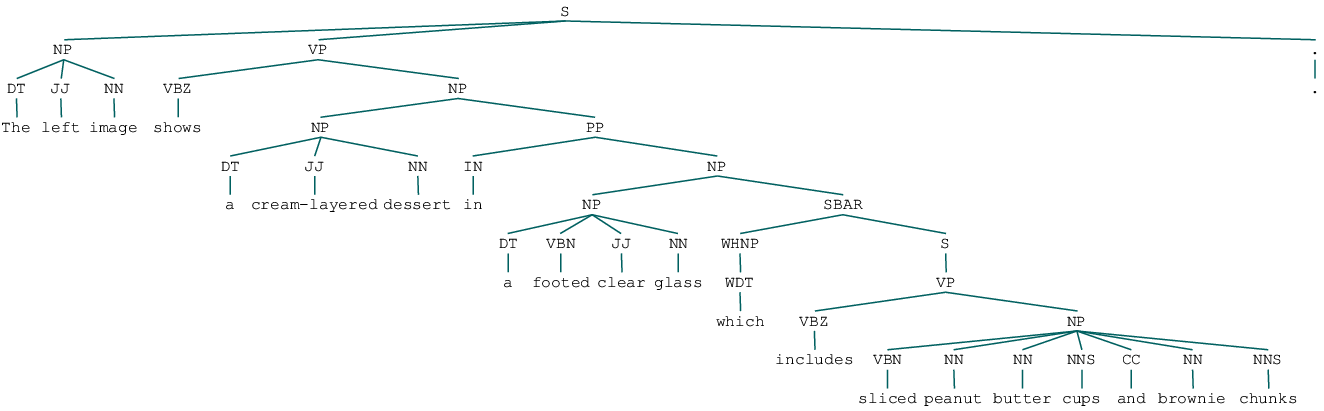

pp_attachment

At least one panda is sitting near a fallen branch on the ground.

SpaCy:


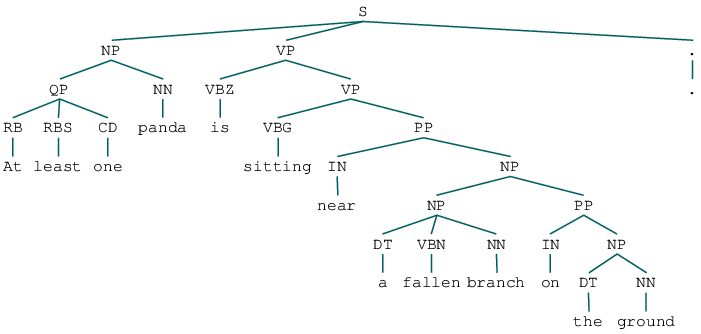

ZPar:


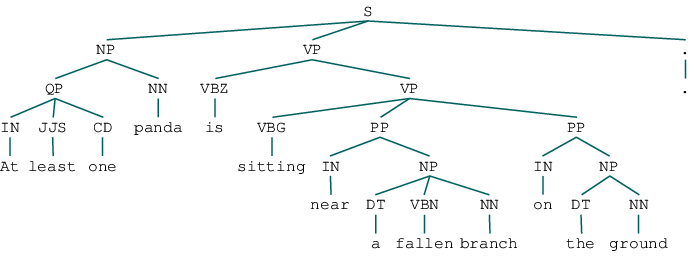

sbar_attachment

Balloons float in a blue sky with dappled clouds on strings that angle rightward, in the right image.

SpaCy:


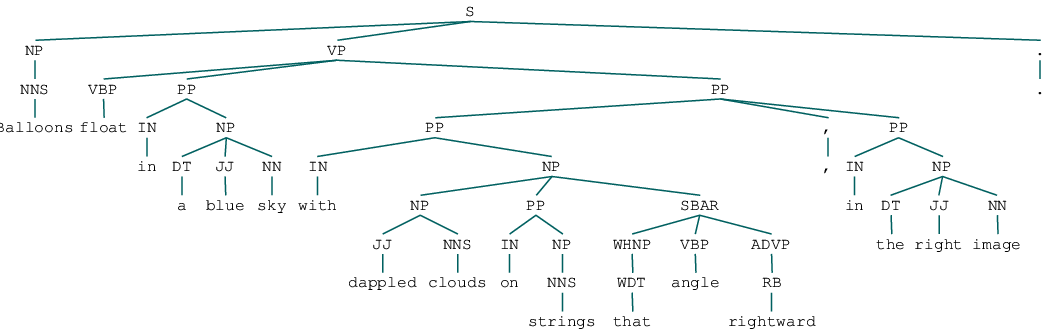

ZPar:


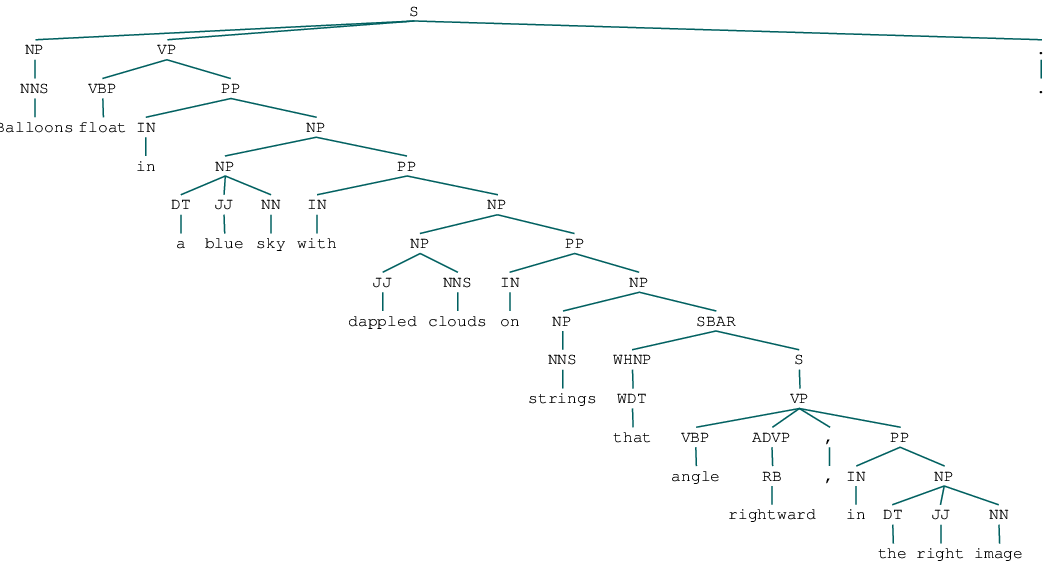

In [14]:
for semantics, sentence in test_cases.items():
    print(semantics)
    print()
    print(sentence)
    print()
    doc = nlp(sentence)
    sent = list(doc.sents)[0]
    spacy_parse = sent._.parse_string
    zpar_parse = z_parser.parse_sentence(sent.text)
    print("SpaCy:")
    #print(spacy_parse)
    display(Tree.fromstring(spacy_parse))
    print("ZPar:")
    #print(zpar_parse)
    display(Tree.fromstring(zpar_parse))
    